In [9]:
import pickle
import csv
from os import listdir
from PIL import Image as PImage
from os import listdir
from os.path import isfile, join
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

## Precipitation measurements of Station in Constance (Sation ID: 2712)
The data which are measured from the ground station in Constance. It should correlate with the pixel of constance in the Radar Data Pngs.

In [6]:
def get_rain_intense_from_station_data():
    rain_intenese_station_constance = []
    with open('regendaten_station_konstanz/produkt_zehn_min_rr_20100101_20191231_02712.csv') as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            rain_intenese_station_constance.append(row[4])
    return rain_intenese_station_constance

In [7]:
print('Anzahl Daten: ' + str(len(get_rain_intense_from_station_data())))

Anzahl Daten: 525890


In [8]:
#Data 06.2017
rain_intenese_station_constance_june_raw = get_rain_intense_from_station_data()[389953:394273]
print("Number of data from station in constance in june 2017: " + str(len(rain_intenese_station_constance_june_raw)))

#Data 07.2017
rain_intenese_station_constance_jule_raw = get_rain_intense_from_station_data()[394273:398737]
print("Number of data from station in constance in jule 2017: " + str(len(rain_intenese_station_constance_jule_raw)))

#Data 07.2017
rain_intenese_station_constance_august_raw = get_rain_intense_from_station_data()[398737:403201]
print("Number of data from station in constance in august 2017: " + str(len(rain_intenese_station_constance_august_raw)))

Number of data from station in constance in june 2017: 4320
Number of data from station in constance in jule 2017: 4464
Number of data from station in constance in august 2017: 4464


In [9]:
f = open('rain_intenese_station_constance_june_raw.pckl', 'wb')
pickle.dump(rain_intenese_station_constance_june_raw, f)
f.close()

f = open('rain_intenese_station_constance_jule_raw.pckl', 'wb')
pickle.dump(rain_intenese_station_constance_jule_raw, f)
f.close()

f = open('rain_intenese_station_constance_august_raw.pckl', 'wb')
pickle.dump(rain_intenese_station_constance_august_raw, f)
f.close()

## RADAR data PNGs for germany from the DWD
This PNGs are used for the forecast networks. The Pixel of constance is on the top (the map of germany is flipped horizontal, see documentation)

In [10]:
def get_only_10_min_images(image_path):
    #get image names from directory
    image_names = os.listdir(image_path)
    image_names.sort()
    
    image_names_only_number = []
    for image in image_names: 
        current_image_number = int(image[:-4])
        if current_image_number % 10 == 0:
            image_names_only_number.append(image)
    return get_rain_intense_from_images(image_names_only_number, image_path)

def get_rain_intense_from_images(images, image_path):
    global got_june
    image_all_pixels = []
    rain_intens_station_pixel = []
    for image in images:
        img = PImage.open(image_path + image)
        img = np.asanyarray(img)
        #img = np.flip(img, axis=0)    
        #img = np.flip(img, axis=1)
        rain_intens_station_pixel.append(img[158, 378])
        #rain_intens_station_pixel.append(img[753,336])
    return rain_intens_station_pixel, image_all_pixels
    

In [11]:

rain_intense_radar_constance_june_raw, image_all_pixels_june = get_only_10_min_images("regendaten_deutschland_png/MonthPNGData/YW2017.002_201706/")
print("RADAR raindata for june 2017: " + str(len(rain_intense_radar_constance_june_raw)))

rain_intense_radar_constance_jule_raw, image_all_pixels_jule  = get_only_10_min_images("regendaten_deutschland_png/MonthPNGData/YW2017.002_201707/")
print("RADAR raindata for jule 2017: " + str(len(rain_intense_radar_constance_jule_raw)))

rain_intense_radar_constance_august_raw, image_all_pixels_august = get_only_10_min_images("regendaten_deutschland_png/MonthPNGData/YW2017.002_201708/")
print("RADAR raindata for august 2017: " + str(len(rain_intense_radar_constance_august_raw)))

RADAR raindata for june 2017: 4320
RADAR raindata for jule 2017: 4464
RADAR raindata for august 2017: 4464


In [12]:
f = open('rain_intense_radar_constance_june_raw.pckl', 'wb')
pickle.dump(rain_intense_radar_constance_june_raw, f)
f.close()

f = open('rain_intense_radar_constance_jule_raw.pckl', 'wb')
pickle.dump(rain_intense_radar_constance_jule_raw, f)
f.close()

f = open('rain_intense_radar_constance_august_raw.pckl', 'wb')
pickle.dump(rain_intense_radar_constance_august_raw, f)
f.close()

## Get the Data from the Pickle Files

In [19]:
f = open('rain_intenese_station_constance_june_raw.pckl', 'rb')
rain_intenese_station_constance_june_raw = pickle.load(f)
f.close()

f = open('rain_intenese_station_constance_jule_raw.pckl', 'rb')
rain_intenese_station_constance_jule_raw = pickle.load(f)
f.close()

f = open('rain_intenese_station_constance_august_raw.pckl', 'rb')
rain_intenese_station_constance_august_raw = pickle.load(f)
f.close()

f = open('rain_intense_radar_constance_june_raw.pckl', 'rb')
rain_intense_radar_constance_june_raw = pickle.load(f)
f.close()

f = open('rain_intense_radar_constance_jule_raw.pckl', 'rb')
rain_intense_radar_constance_jule_raw = pickle.load(f)
f.close()

f = open('rain_intense_radar_constance_august_raw.pckl', 'rb')
rain_intense_radar_constance_august_raw = pickle.load(f)
f.close()

f = open('all_pixels_one_week.pckl', 'rb')
all_pixels_one_week = pickle.load(f)
f.close()

f = open('corr.pckl', 'rb')
corr = pickle.load(f)
f.close()

## Normalize rain data

In [22]:
def normalize_data(data):
    data = [float(x) for x in data]
    
    new_data = []
    max_data = max(data)
    min_data = min(data)
    for item in data:
        new_data.append((float(item)-min_data)/(max_data-min_data))
    new_data.remove(min(new_data))
    return new_data

def create_categorie_data(list):
    new_list = np.asanyarray(list)
    new_list[new_list > 0] = 1
    new_list[new_list <= 0] = 0
    return new_list

In [23]:
# normalized data
rain_intenese_station_constance_june = normalize_data(rain_intenese_station_constance_june_raw)
rain_intenese_station_constance_jule = normalize_data(rain_intenese_station_constance_jule_raw[:4320])
rain_intenese_station_constance_august = normalize_data(rain_intenese_station_constance_august_raw[:4320])

rain_intense_radar_constance_june = normalize_data(rain_intense_radar_constance_june_raw)
rain_intense_radar_constance_jule = normalize_data(rain_intense_radar_constance_jule_raw[:4320])
rain_intense_radar_constance_august = normalize_data(rain_intense_radar_constance_august_raw[:4320])

# categorical data
rain_station_categorical_june = create_categorie_data(rain_intenese_station_constance_june)
rain_station_categorical_jule = create_categorie_data(rain_intenese_station_constance_jule)
rain_station_categorical_august = create_categorie_data(rain_intenese_station_constance_august)

rain_radar_categorical_june = create_categorie_data(rain_intense_radar_constance_june)
rain_radar_categorical_jule = create_categorie_data(rain_intense_radar_constance_jule)
rain_radar_categorical_august = create_categorie_data(rain_intense_radar_constance_august)

# convert raw data to float
rain_intenese_station_constance_june_raw_float = [float(x) for x in rain_intenese_station_constance_june_raw]
rain_intense_radar_constance_june_raw_float = [float(x) for x in rain_intense_radar_constance_june_raw]

rain_intenese_station_constance_jule_raw_float = [float(x) for x in rain_intenese_station_constance_jule_raw]
rain_intense_radar_constance_jule_raw_float = [float(x) for x in rain_intense_radar_constance_jule_raw]

rain_intenese_station_constance_august_raw_float = [float(x) for x in rain_intenese_station_constance_august_raw]
rain_intense_radar_constance_august_raw_float = [float(x) for x in rain_intense_radar_constance_august_raw]

## Code to find right pixel with correlation
Check which pixel in the png correlate the most with the stationdata.

In [11]:
def get_only_10_min_all_pixels_one_week(image_path):
    #get image names from directory
    image_names = os.listdir(image_path)
    image_names.sort()
    
    image_names_only_number = []
    for image in image_names: 
        current_image_number = int(image[:-4])
        if current_image_number % 10 == 0:
            image_names_only_number.append(image)
    return get_all_pixel_values(image_names_only_number[:1000], image_path)

def get_all_pixel_values(images, image_path):
    image_all_pixels = []
    for image in images:
        img = PImage.open(image_path + image)
        img = np.asanyarray(img)
        image_all_pixels.append(img)
    
    image_all_pixels = np.asanyarray(image_all_pixels)
    image_all_pixels = np.stack(image_all_pixels, axis=-1)
    print(image_all_pixels.shape)
    return image_all_pixels

In [12]:
# get the rain data of al pixel in germany for first week of june
all_pixels_one_week = get_only_10_min_all_pixels_one_week("regendaten_deutschland_png/MonthPNGData/YW2017.002_201706/")

(1100, 900, 1000)


In [13]:
f = open('all_pixels_one_week.pckl', 'wb')
pickle.dump(all_pixels_one_week, f)
f.close()

In [17]:
# function to calculate the correlation
def calculate_correlation_all_pixels(all_pixels):
    correlation_coef = []
    pixel = []
    for y_index in range(all_pixels.shape[0]):
        for x_index in range(all_pixels.shape[1]):
            correlation_coef.append([np.cov(np.stack((rain_intenese_station_constance_june[:1000], all_pixels[y_index][x_index]), axis=0))[1][0], y_index, x_index])
            if(x_index % 1000 == 0):
                print('Iteration: ' + str(y_index) + ' : ' + str(x_index))
    return correlation_coef  

In [24]:
corr = calculate_correlation_all_pixels(all_pixels_one_week)
corr = np.nan_to_num(corr)

f = open('corr.pckl', 'wb')
pickle.dump(corr, f)
f.close()

Iteration: 0 : 0
Iteration: 1 : 0
Iteration: 2 : 0
Iteration: 3 : 0
Iteration: 4 : 0
Iteration: 5 : 0
Iteration: 6 : 0
Iteration: 7 : 0
Iteration: 8 : 0
Iteration: 9 : 0
Iteration: 10 : 0
Iteration: 11 : 0
Iteration: 12 : 0
Iteration: 13 : 0
Iteration: 14 : 0
Iteration: 15 : 0
Iteration: 16 : 0
Iteration: 17 : 0
Iteration: 18 : 0
Iteration: 19 : 0
Iteration: 20 : 0
Iteration: 21 : 0
Iteration: 22 : 0
Iteration: 23 : 0
Iteration: 24 : 0
Iteration: 25 : 0
Iteration: 26 : 0
Iteration: 27 : 0
Iteration: 28 : 0
Iteration: 29 : 0
Iteration: 30 : 0
Iteration: 31 : 0
Iteration: 32 : 0
Iteration: 33 : 0
Iteration: 34 : 0
Iteration: 35 : 0
Iteration: 36 : 0
Iteration: 37 : 0
Iteration: 38 : 0
Iteration: 39 : 0
Iteration: 40 : 0
Iteration: 41 : 0
Iteration: 42 : 0
Iteration: 43 : 0
Iteration: 44 : 0
Iteration: 45 : 0
Iteration: 46 : 0
Iteration: 47 : 0
Iteration: 48 : 0
Iteration: 49 : 0
Iteration: 50 : 0
Iteration: 51 : 0
Iteration: 52 : 0
Iteration: 53 : 0
Iteration: 54 : 0
Iteration: 55 : 0
It

Iteration: 438 : 0
Iteration: 439 : 0
Iteration: 440 : 0
Iteration: 441 : 0
Iteration: 442 : 0
Iteration: 443 : 0
Iteration: 444 : 0
Iteration: 445 : 0
Iteration: 446 : 0
Iteration: 447 : 0
Iteration: 448 : 0
Iteration: 449 : 0
Iteration: 450 : 0
Iteration: 451 : 0
Iteration: 452 : 0
Iteration: 453 : 0
Iteration: 454 : 0
Iteration: 455 : 0
Iteration: 456 : 0
Iteration: 457 : 0
Iteration: 458 : 0
Iteration: 459 : 0
Iteration: 460 : 0
Iteration: 461 : 0
Iteration: 462 : 0
Iteration: 463 : 0
Iteration: 464 : 0
Iteration: 465 : 0
Iteration: 466 : 0
Iteration: 467 : 0
Iteration: 468 : 0
Iteration: 469 : 0
Iteration: 470 : 0
Iteration: 471 : 0
Iteration: 472 : 0
Iteration: 473 : 0
Iteration: 474 : 0
Iteration: 475 : 0
Iteration: 476 : 0
Iteration: 477 : 0
Iteration: 478 : 0
Iteration: 479 : 0
Iteration: 480 : 0
Iteration: 481 : 0
Iteration: 482 : 0
Iteration: 483 : 0
Iteration: 484 : 0
Iteration: 485 : 0
Iteration: 486 : 0
Iteration: 487 : 0
Iteration: 488 : 0
Iteration: 489 : 0
Iteration: 4

Iteration: 871 : 0
Iteration: 872 : 0
Iteration: 873 : 0
Iteration: 874 : 0
Iteration: 875 : 0
Iteration: 876 : 0
Iteration: 877 : 0
Iteration: 878 : 0
Iteration: 879 : 0
Iteration: 880 : 0
Iteration: 881 : 0
Iteration: 882 : 0
Iteration: 883 : 0
Iteration: 884 : 0
Iteration: 885 : 0
Iteration: 886 : 0
Iteration: 887 : 0
Iteration: 888 : 0
Iteration: 889 : 0
Iteration: 890 : 0
Iteration: 891 : 0
Iteration: 892 : 0
Iteration: 893 : 0
Iteration: 894 : 0
Iteration: 895 : 0
Iteration: 896 : 0
Iteration: 897 : 0
Iteration: 898 : 0
Iteration: 899 : 0
Iteration: 900 : 0
Iteration: 901 : 0
Iteration: 902 : 0
Iteration: 903 : 0
Iteration: 904 : 0
Iteration: 905 : 0
Iteration: 906 : 0
Iteration: 907 : 0
Iteration: 908 : 0
Iteration: 909 : 0
Iteration: 910 : 0
Iteration: 911 : 0
Iteration: 912 : 0
Iteration: 913 : 0
Iteration: 914 : 0
Iteration: 915 : 0
Iteration: 916 : 0
Iteration: 917 : 0
Iteration: 918 : 0
Iteration: 919 : 0
Iteration: 920 : 0
Iteration: 921 : 0
Iteration: 922 : 0
Iteration: 9

In [25]:
corr_map = np.zeros((1100,900))
# 255 / (max value of corr)
scale_factor = 255/corr[corr[:,0].argsort()][-1][0]
for item in corr:
    corr_map[int(item[1]), int(item[2])] = item[0]*scale_factor

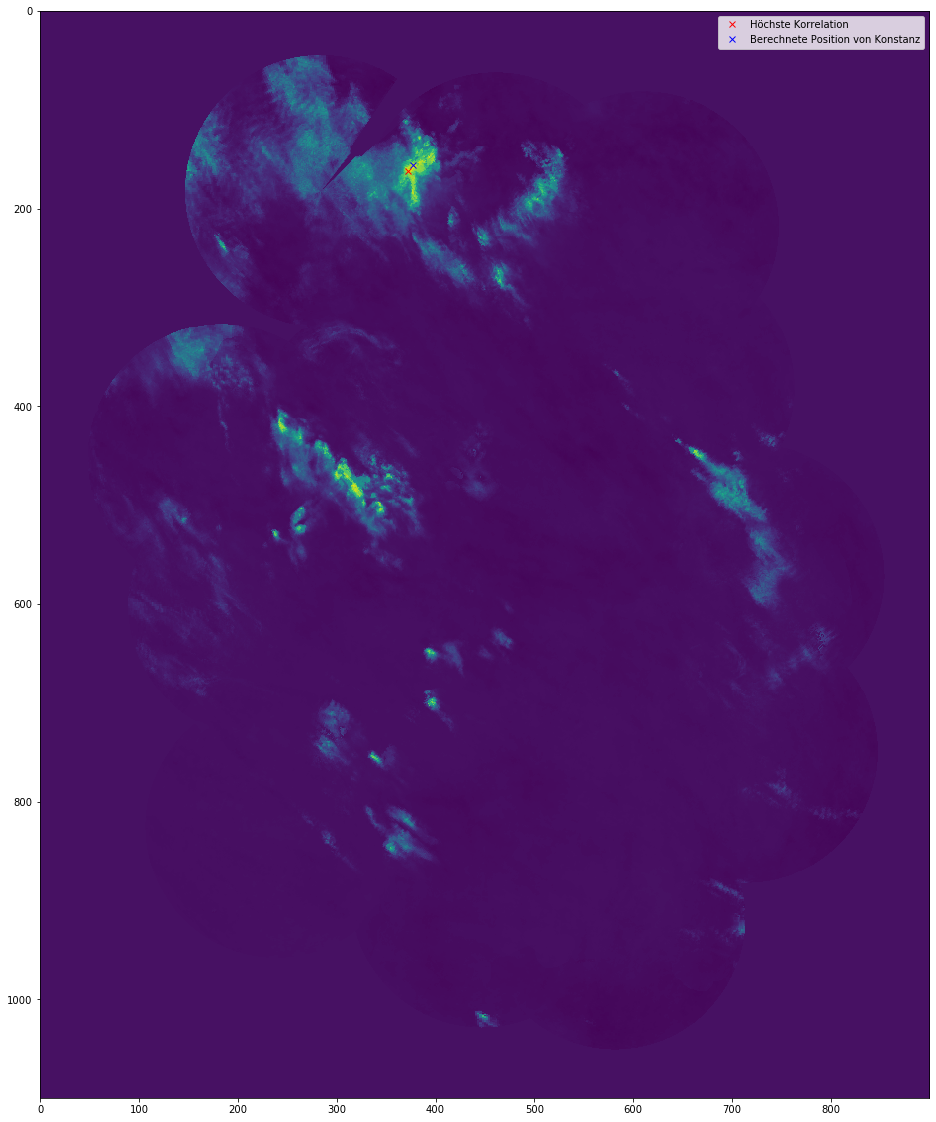

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(corr_map)
plt.plot(372, 162, 'rx', label = 'Höchste Korrelation')
plt.plot(377, 156, 'bx', label = 'Berechnete Position von Konstanz')
plt.legend()
plt.savefig('Korrelation_Karte.png', bbox_inches='tight', pad_inches=0)

In [22]:
corr_image = Image.fromarray(np.uint8(corr_map, axis=0)).convert('RGB')
corr_image.show()

In [23]:
float_raw = [float(x) for x in rain_intenese_station_constance_june_raw]
print(corr[corr[:,0].argsort()][-20:])

[[3.42926936e-01 1.48000000e+02 3.93000000e+02]
 [3.43363763e-01 1.61000000e+02 3.72000000e+02]
 [3.44114208e-01 1.61000000e+02 3.71000000e+02]
 [3.45021126e-01 1.58000000e+02 3.78000000e+02]
 [3.46012210e-01 1.59000000e+02 3.75000000e+02]
 [3.46116999e-01 1.60000000e+02 3.76000000e+02]
 [3.46365115e-01 1.57000000e+02 3.78000000e+02]
 [3.47118888e-01 1.59000000e+02 3.78000000e+02]
 [3.48175219e-01 4.80000000e+02 3.17000000e+02]
 [3.48633686e-01 1.62000000e+02 3.74000000e+02]
 [3.49148993e-01 1.60000000e+02 3.75000000e+02]
 [3.49418070e-01 1.63000000e+02 3.73000000e+02]
 [3.50026655e-01 1.61000000e+02 3.73000000e+02]
 [3.50557362e-01 1.59000000e+02 3.77000000e+02]
 [3.51249512e-01 1.61000000e+02 3.75000000e+02]
 [3.53013781e-01 1.58000000e+02 3.77000000e+02]
 [3.55219940e-01 1.59000000e+02 3.76000000e+02]
 [3.55523797e-01 1.61000000e+02 3.74000000e+02]
 [3.61661656e-01 1.62000000e+02 3.73000000e+02]
 [3.65119840e-01 1.62000000e+02 3.72000000e+02]]


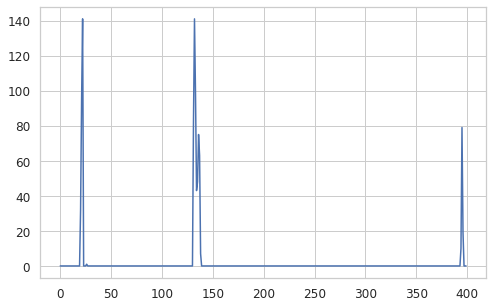

In [160]:
plt.plot(all_pixels_one_week[162][372][:400])

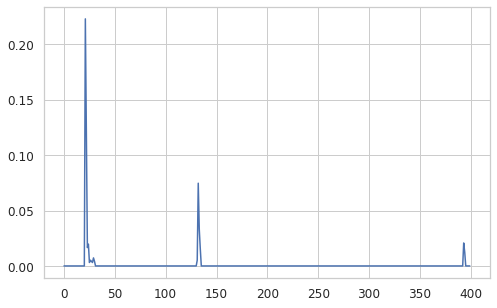

In [161]:
plt.plot(rain_intenese_station_constance_june[:400])

## Compare Data

### Some help functions

In [17]:
def get_percentil_of_data(data_station_june, data_radar_june, data_station_jule, data_radar_jule, data_station_august, data_radar_august):
    data_june = {
    'station_data_june': data_station_june, 
    'radar_data_june': data_radar_june, 
    }
    rain_data_june = pd.DataFrame(data_june) 
    rain_data_june = rain_data_june[rain_data_june.station_data_june > 0.0001]
    rain_data_june = rain_data_june[rain_data_june.station_data_june < 0.2]
    
    data_jule = {
    'station_data_jule': data_station_jule, 
    'radar_data_jule': data_radar_jule, 
    }
    rain_data_jule = pd.DataFrame(data_jule) 
    rain_data_jule = rain_data_jule[rain_data_jule.station_data_jule > 0.0001]
    rain_data_jule = rain_data_jule[rain_data_jule.station_data_jule < 0.2]
    
    data_august = {
    'station_data_august': data_station_august, 
    'radar_data_august': data_radar_august, 
    }
    rain_data_august = pd.DataFrame(data_august) 
    rain_data_august = rain_data_august[rain_data_august.station_data_august > 0.0001]
    rain_data_august = rain_data_august[rain_data_august.station_data_august < 0.2]
    
    rain_data = {
    'station_data_june': rain_data_june.station_data_june, 
    'radar_data_june': rain_data_june.radar_data_june, 
    'station_data_jule': rain_data_jule.station_data_jule, 
    'radar_data_jule': rain_data_jule.radar_data_jule,
    'station_data_august': rain_data_august.station_data_august,
    'radar_data_august': rain_data_august.radar_data_august,
    }
    rain_data = pd.DataFrame(rain_data)
    
    return rain_data

### Exploratory Data Analysis (EDA)

In [33]:
import pandas as pd 
station_june = [float(i) for i in rain_intenese_station_constance_june_raw]
station_jule = [float(i) for i in rain_intenese_station_constance_jule_raw[:4320]]
station_august = [float(i) for i in rain_intenese_station_constance_august_raw[:4320]]

rain_data = get_percentil_of_data(normalize_data(station_june), normalize_data(rain_intense_radar_constance_june_raw), normalize_data(station_jule), normalize_data(rain_intense_radar_constance_jule_raw[:4320]), normalize_data(station_august), normalize_data(rain_intense_radar_constance_august_raw[:4320]))
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 10 to 4313
Data columns (total 6 columns):
station_data_june      204 non-null float64
radar_data_june        204 non-null float64
station_data_jule      325 non-null float64
radar_data_jule        325 non-null float64
station_data_august    219 non-null float64
radar_data_august      219 non-null float64
dtypes: float64(6)
memory usage: 39.2 KB


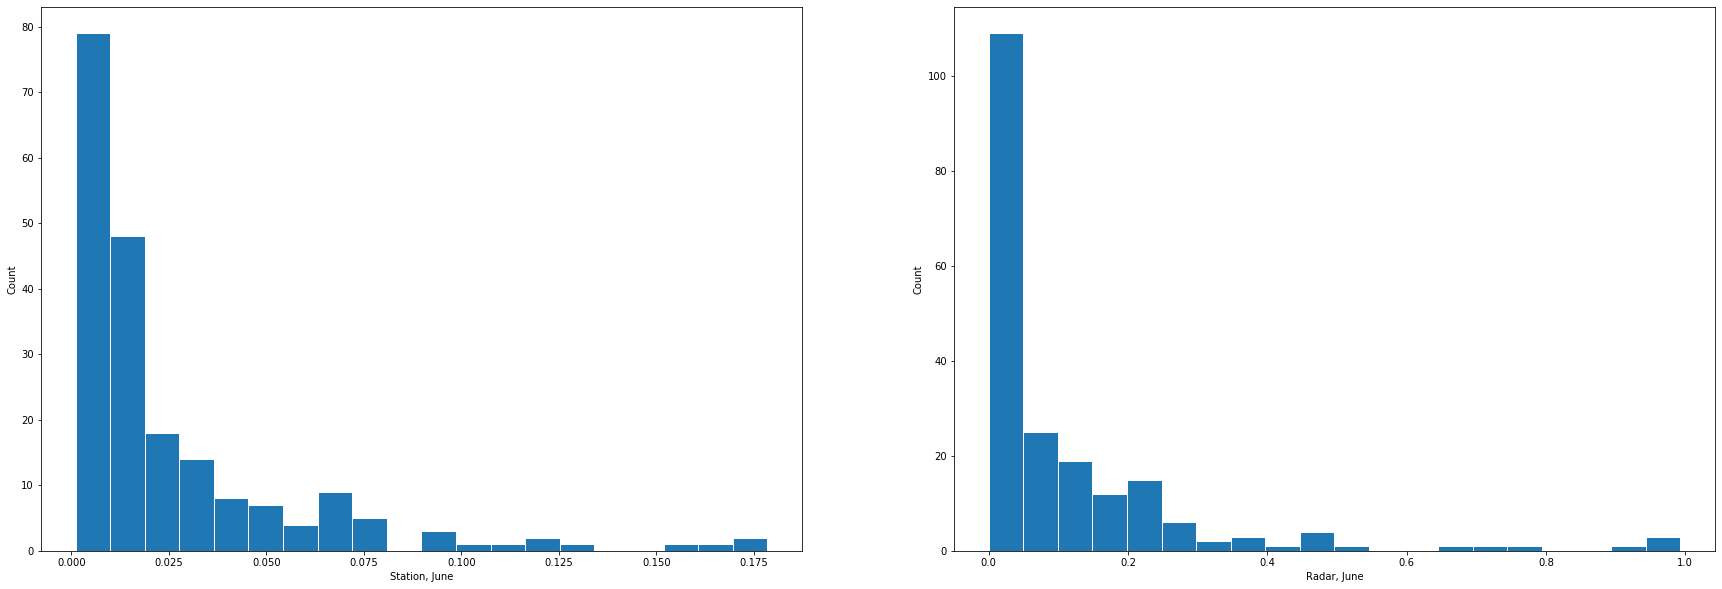

In [34]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=False)
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(rain_data.station_data_june, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axes[0]).set(xlabel='Station, June', ylabel='Count');
sns.distplot(rain_data.radar_data_june, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axes[1]).set(xlabel='Radar, June', ylabel='Count');

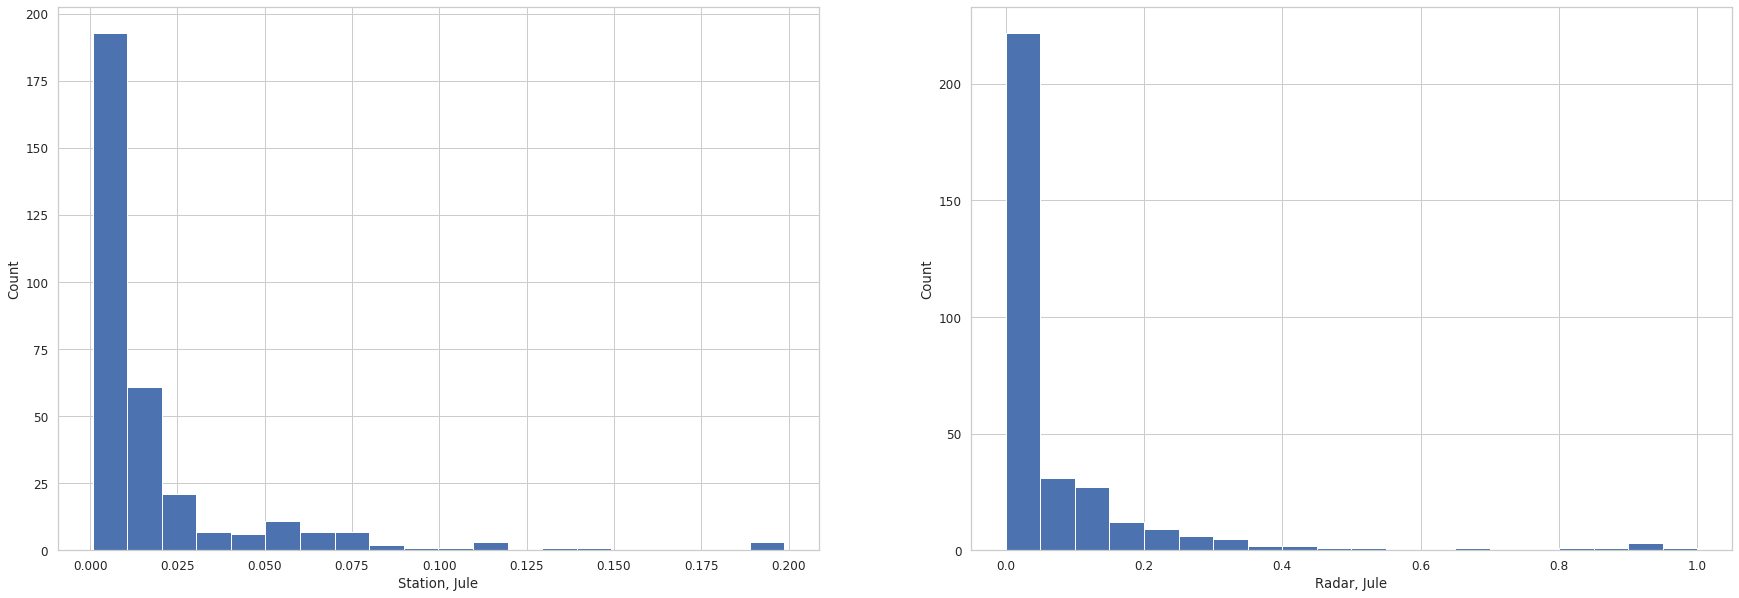

In [35]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=False)
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(rain_data.station_data_jule, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axes[0]).set(xlabel='Station, Jule', ylabel='Count');
sns.distplot(rain_data.radar_data_jule, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axes[1]).set(xlabel='Radar, Jule', ylabel='Count');

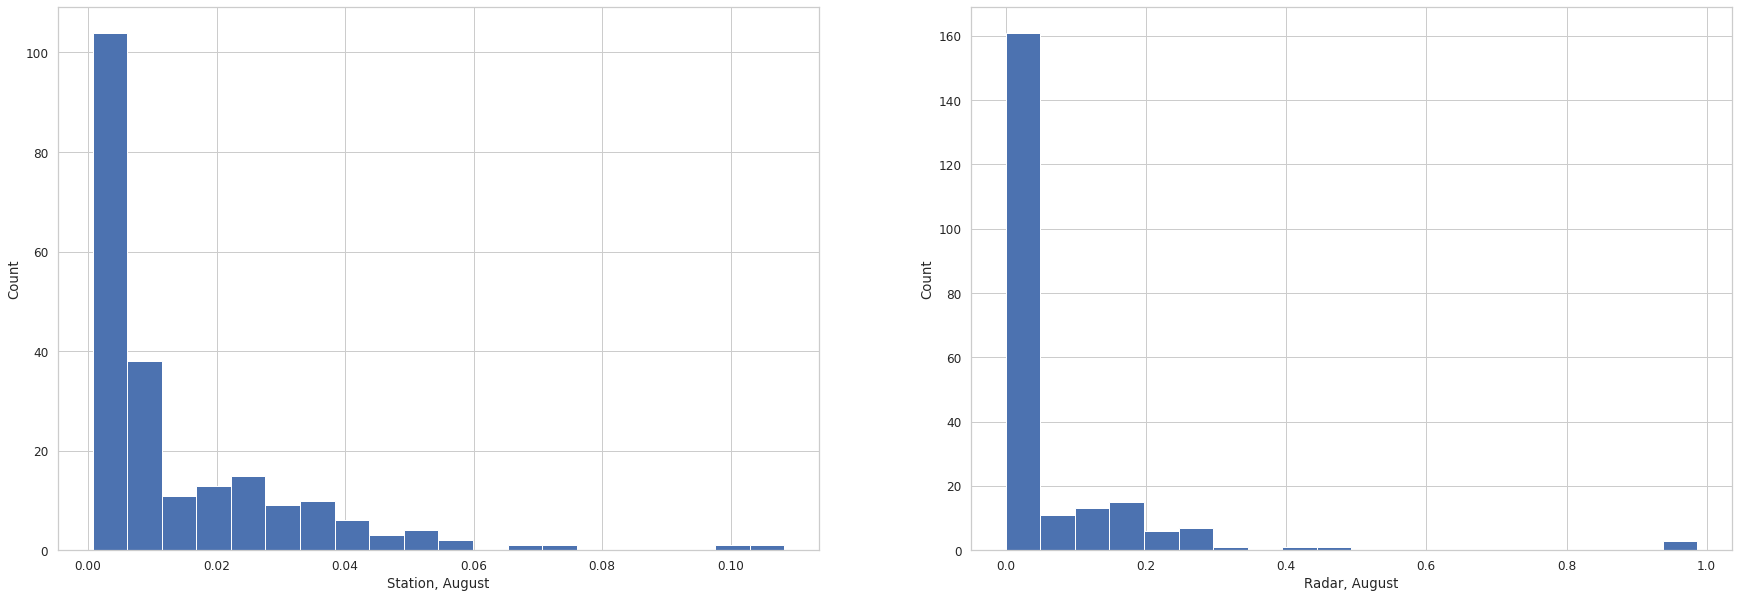

In [36]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=False)
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(rain_data.station_data_august, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axes[0]).set(xlabel='Station, August', ylabel='Count');
sns.distplot(rain_data.radar_data_august, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axes[1]).set(xlabel='Radar, August', ylabel='Count');

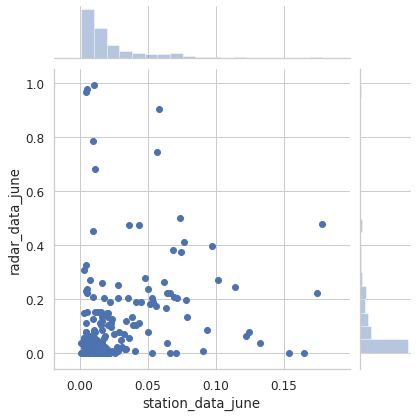

In [37]:
sns.jointplot(x=rain_data.station_data_june, y=rain_data.radar_data_june);

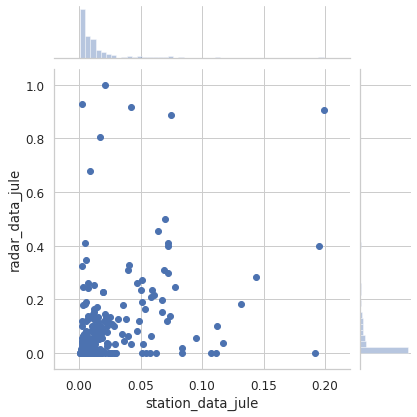

In [178]:
sns.jointplot(x=rain_data.station_data_jule, y=rain_data.radar_data_jule);

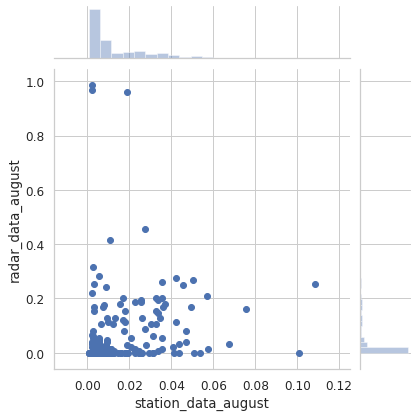

In [179]:
sns.jointplot(x=rain_data.station_data_august, y=rain_data.radar_data_august);

In [181]:
print(np.mean(rain_data.station_data_june))
print(np.mean(rain_data.station_data_jule))
print(np.mean(rain_data.station_data_august))
print(np.mean(rain_data.radar_data_june))
print(np.mean(rain_data.radar_data_jule))
print(np.mean(rain_data.radar_data_august))

0.026238711252135706
0.018355364442320964
0.0144133412745682
0.11070261437908496
0.07094449853943524
0.06037203885875394


### Confusion Matrix of June
Splitted Data in two classes 'rain' and 'no rain'.

In [18]:
import sklearn.metrics

print(sklearn.metrics.confusion_matrix(rain_station_categorical_june, rain_radar_categorical_june))
print('3993 mal kein Regen in Station, kein Regen von Radar')
print('112 mal kein Regen in Station, Regen von Radar')
print('68 mal Regen in Station, kein Regen von Radar')
print('146 mal Regen in Station, Regen von Radar \n')

print(sklearn.metrics.confusion_matrix(rain_station_categorical_jule, rain_radar_categorical_jule))
print('3870 mal kein Regen in Station, kein Regen von Radar')
print('112 mal kein Regen in Station, Regen von Radar')
print('153 mal Regen in Station, kein Regen von Radar')
print('184 mal Regen in Station, Regen von Radar \n')

print(sklearn.metrics.confusion_matrix(rain_station_categorical_august, rain_radar_categorical_august))
print('4014 mal kein Regen in Station, kein Regen von Radar')
print('77 mal kein Regen in Station, Regen von Radar')
print('111 mal Regen in Station, kein Regen von Radar')
print('117 mal Regen in Station, Regen von Radar')

[[3993  112]
 [  68  146]]
3993 mal kein Regen in Station, kein Regen von Radar
112 mal kein Regen in Station, Regen von Radar
68 mal Regen in Station, kein Regen von Radar
146 mal Regen in Station, Regen von Radar 

[[3870  112]
 [ 153  184]]
3870 mal kein Regen in Station, kein Regen von Radar
112 mal kein Regen in Station, Regen von Radar
153 mal Regen in Station, kein Regen von Radar
184 mal Regen in Station, Regen von Radar 

[[4014   77]
 [ 111  117]]
4014 mal kein Regen in Station, kein Regen von Radar
77 mal kein Regen in Station, Regen von Radar
111 mal Regen in Station, kein Regen von Radar
117 mal Regen in Station, Regen von Radar


In [19]:
june_confusion_data = np.array([[3993, 112],
                   [68, 146]])
jule_confusion_data = np.array([[3870, 112],
                   [153, 184]])
august_confusion_data = np.array([[4014, 77],
                   [111, 117]])

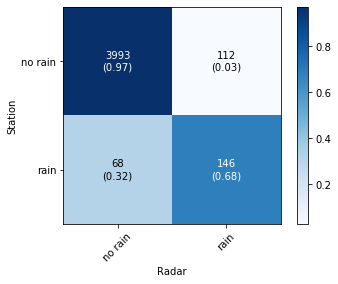

In [42]:
fig, ax = plot_confusion_matrix(conf_mat=june_confusion_data,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                class_names=['no rain', 'rain'])
ax.set_xlabel('Radar');ax.set_ylabel('Station'); 
plt.savefig('Confusion_Matrix_June.png', bbox_inches='tight', pad_inches=0)
plt.show()

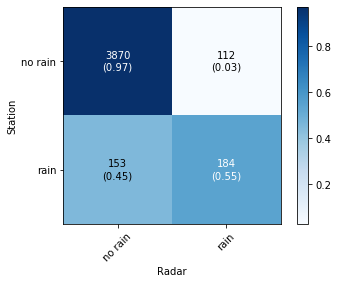

In [43]:
fig, ax = plot_confusion_matrix(conf_mat=jule_confusion_data,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                class_names=['no rain', 'rain'])
ax.set_xlabel('Radar');ax.set_ylabel('Station'); 
plt.savefig('Confusion_Matrix_Jule.png', bbox_inches='tight', pad_inches=0)
plt.show()

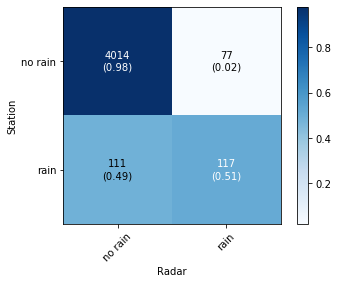

In [41]:
fig, ax = plot_confusion_matrix(conf_mat=august_confusion_data,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                class_names=['no rain', 'rain'])
ax.set_xlabel('Radar');ax.set_ylabel('Station')
plt.savefig('Confusion_Matrix_August.png', bbox_inches='tight', pad_inches=0)
plt.show()

### Compare raindata, in all timesteps where it is different

In [43]:
def print_differences(station, radar):
    differences_list = []
    for index in range(len(rain_station_categorical_june)):
        if rain_station_categorical_june[index] == station:
            if rain_radar_categorical_june[index] == radar: 
                #print('Station: ' + str(rain_intenese_station_constance_june[index]) + ' Radar: ' + str(rain_intense_radar_constance_june[index]))
                if station == 0:
                    differences_list.append(rain_intense_radar_constance_june[index])
                if radar == 0: 
                    differences_list.append(rain_intenese_station_constance_june[index])
    if station == 0:
        print('Mean of radar values which are different to station: ' + str(np.mean(differences_list)))
                        
    if radar == 0:
        print('Mean of station values which are different to radar: ' + str(np.mean(differences_list)))

#### FP (112 elements)
Station = no rain. Radar = rain.

In [44]:
print_differences(0, 1)

Mean of radar values which are different to station: 0.07366071428571429


#### FN (68 elements)
Station = rain. Radar = no rain.

In [45]:
print_differences(1,0)

Mean of station values which are different to radar: 0.0325237979009031


Like we see here, the outliers are not even small. Some of them are "really" wrong. 

### Plot the data

In [33]:
def create_x_axis(y_data):
    x_axis = []
    for intense in range(len(y_data)): 
        x_axis.append(intense)
    return x_axis

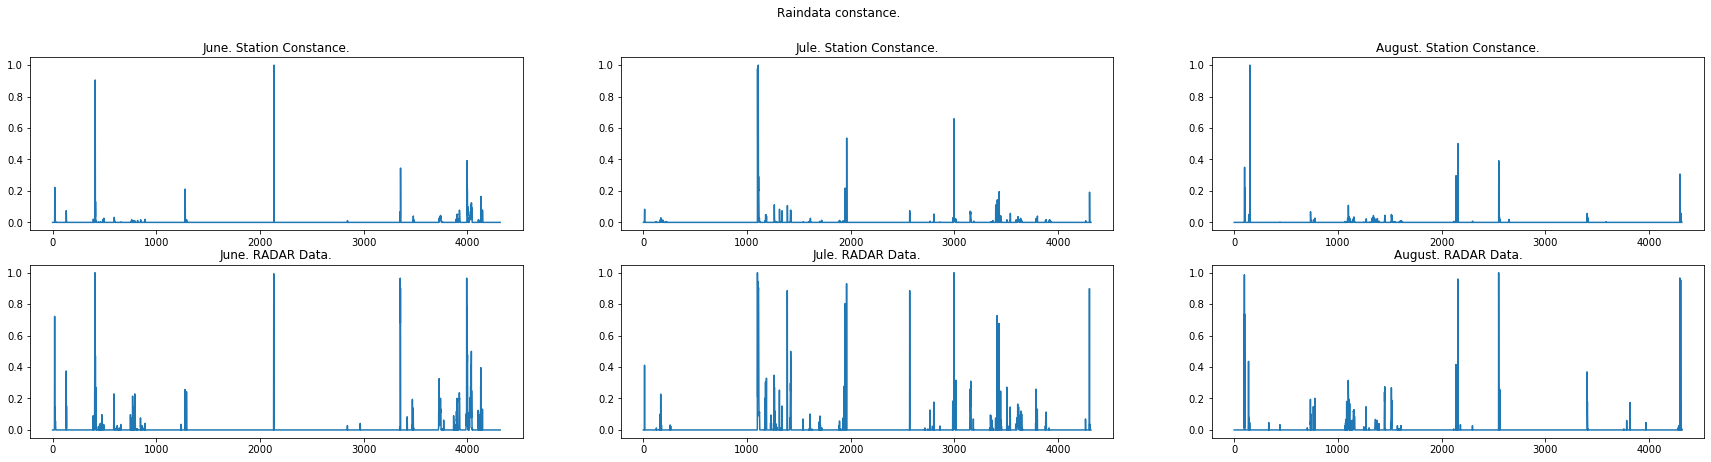

In [36]:
fig, ax = plt.subplots(2, 3, figsize=(30, 7))
fig.suptitle('Raindata constance. ')
# Station Constance Data
ax[0,0].set_title('June. Station Constance.')
ax[0,0].plot(create_x_axis(rain_intenese_station_constance_june), rain_intenese_station_constance_june)
ax[0,1].set_title('Jule. Station Constance.')
ax[0,1].plot(create_x_axis(rain_intenese_station_constance_jule), rain_intenese_station_constance_jule)
ax[0,2].set_title('August. Station Constance.')
ax[0,2].plot(create_x_axis(rain_intenese_station_constance_august), rain_intenese_station_constance_august)
#Radar data
ax[1,0].set_title('June. RADAR Data.')
ax[1,0].plot(create_x_axis(rain_intense_radar_constance_june), rain_intense_radar_constance_june)
ax[1,1].set_title('Jule. RADAR Data.')
ax[1,1].plot(create_x_axis(rain_intense_radar_constance_jule), rain_intense_radar_constance_jule)
ax[1,2].set_title('August. RADAR Data.')
ax[1,2].plot(create_x_axis(rain_intense_radar_constance_august), rain_intense_radar_constance_august)

plt.savefig('radar_station_daten_vergleich.png', bbox_inches='tight', pad_inches=1)

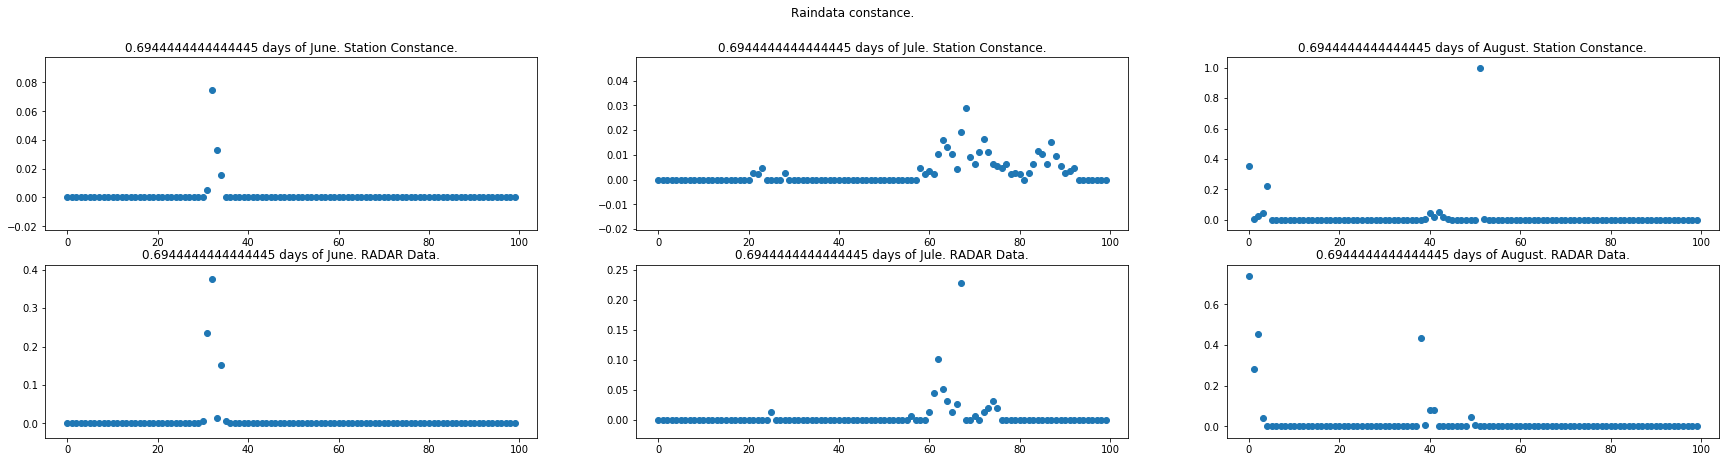

In [32]:
period_start = 100
period_end = 200
days = ((period_end-period_start)*10)/60/24
fig, ax = plt.subplots(2, 3, figsize=(30, 7))
fig.suptitle('Raindata constance. ')
# Station Constance Data
ax[0,0].set_title(str(days) + ' days of June. Station Constance.')
ax[0,0].scatter(create_x_axis(rain_intenese_station_constance_june[period_start:period_end]), rain_intenese_station_constance_june[period_start:period_end], )
ax[0,1].set_title(str(days) + ' days of Jule. Station Constance.')
ax[0,1].scatter(create_x_axis(rain_intenese_station_constance_jule[period_start:period_end]), rain_intenese_station_constance_jule[period_start:period_end])
ax[0,2].set_title(str(days) + ' days of August. Station Constance.')
ax[0,2].scatter(create_x_axis(rain_intenese_station_constance_august[period_start:period_end]), rain_intenese_station_constance_august[period_start:period_end])
#Radar data
ax[1,0].set_title(str(days) + ' days of June. RADAR Data.')
ax[1,0].scatter(create_x_axis(rain_intense_radar_constance_june[period_start:period_end]), rain_intense_radar_constance_june[period_start:period_end])
ax[1,1].set_title(str(days) + ' days of Jule. RADAR Data.')
ax[1,1].scatter(create_x_axis(rain_intense_radar_constance_jule[period_start:period_end]), rain_intense_radar_constance_jule[period_start:period_end])
ax[1,2].set_title(str(days) + ' days of August. RADAR Data.')
ax[1,2].scatter(create_x_axis(rain_intense_radar_constance_august[period_start:period_end]), rain_intense_radar_constance_august[period_start:period_end])

### Correlation

In [49]:
print('June')
print(np.cov(rain_intenese_station_constance_june_raw_float, rain_intense_radar_constance_june_raw_float))
print('Jule')
print(np.cov(rain_intenese_station_constance_jule_raw_float, rain_intense_radar_constance_jule_raw_float))
print('August')
print(np.cov(rain_intenese_station_constance_august_raw_float, rain_intense_radar_constance_august_raw_float))

print('With categorical data')

print('June')
print(np.cov(rain_station_categorical_june, rain_radar_categorical_june))
print('Jule')
print(np.cov(rain_station_categorical_jule, rain_radar_categorical_jule))
print('August')
print(np.cov(rain_station_categorical_august, rain_radar_categorical_august))

June
[[ 0.07300163  0.94730961]
 [ 0.94730961 69.43948568]]
Jule
[[  0.19168251   2.49307084]
 [  2.49307084 109.39574836]]
August
[[ 0.10833025  0.78756388]
 [ 0.78756388 73.03887319]]
With categorical data
June
[[0.04710436 0.03085143]
 [0.03085143 0.05618066]]
Jule
[[0.07195572 0.03726353]
 [0.03726353 0.06385221]]
August
[[0.05001479 0.02472412]
 [0.02472412 0.04291013]]
